In [1]:
import pandas as pd
import numpy as np

# Load your data
df = pd.read_csv('Book1.csv')

# Check for missing values
print(df.isnull().sum())

# Handle missing values (example using mean imputation)
df['Murder Rate'].fillna(df['Murder Rate'].mean(), inplace=True)
df['Poverty Rate (%)'].fillna(df['Poverty Rate (%)'].median(), inplace=True)

# Advanced imputation using KNNImputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[['Education Level (Avg. Years)', 'Literacy Rate (%)']] = imputer.fit_transform(df[['Education Level (Avg. Years)', 'Literacy Rate (%)']])

# Check for remaining missing values
print(df.isnull().sum())

Year                            0
Province                        0
Murder Rate                     0
Poverty Rate (%)                0
Unemployment Rate (%)           0
Income Inequality Index         0
Education Level (Avg. Years)    0
Literacy Rate (%)               0
dtype: int64


C:\Users\CAPTAN\AppData\Local\Temp\ipykernel_1420\269876689.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Murder Rate'].fillna(df['Murder Rate'].mean(), inplace=True)
C:\Users\CAPTAN\AppData\Local\Temp\ipykernel_1420\269876689.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

Year                            0
Province                        0
Murder Rate                     0
Poverty Rate (%)                0
Unemployment Rate (%)           0
Income Inequality Index         0
Education Level (Avg. Years)    0
Literacy Rate (%)               0
dtype: int64


Year                              int64
Province                         object
Murder Rate                     float64
Poverty Rate (%)                float64
Unemployment Rate (%)           float64
Income Inequality Index         float64
Education Level (Avg. Years)    float64
Literacy Rate (%)                 int64
dtype: object


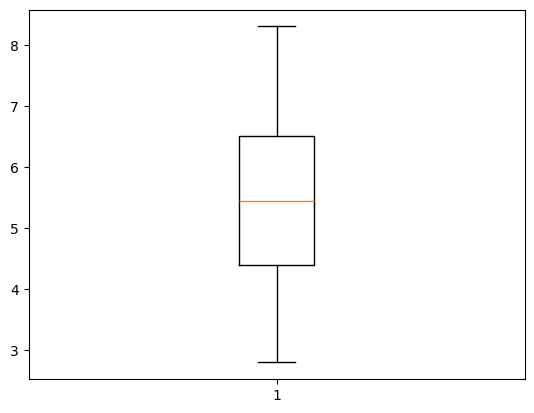

Empty DataFrame
Columns: [Year, Province, Murder Rate, Poverty Rate (%), Unemployment Rate (%), Income Inequality Index, Education Level (Avg. Years), Literacy Rate (%)]
Index: []


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('Murder dataset.csv')

# 1. Data Formatting
# Check data types
print(df.dtypes)

# Convert columns to appropriate data types if necessary
# Example:
# df['Date'] = pd.to_datetime(df['Date'])

# 2. Outlier Detection and Handling
# Visualize using box plots
plt.boxplot(df['Murder Rate'])
plt.show()

# Identify outliers using z-scores
z_scores = (df['Murder Rate'] - df['Murder Rate'].mean()) / df['Murder Rate'].std()
outliers = df[abs(z_scores) > 3]
print(outliers)

# Handle outliers (e.g., capping)
def cap_outliers(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    col = np.clip(col, lower_bound, upper_bound)
    return col

df['Murder Rate'] = cap_outliers(df['Murder Rate'])

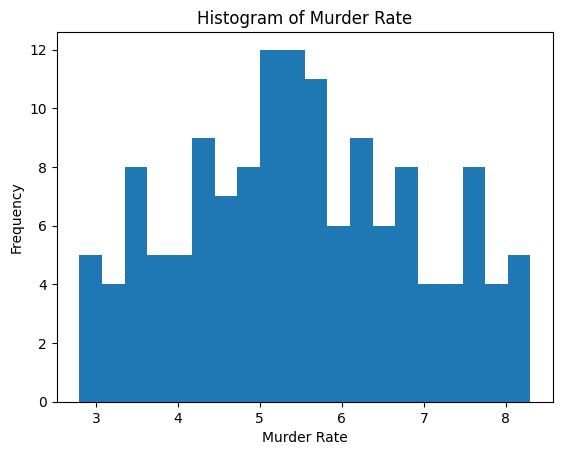

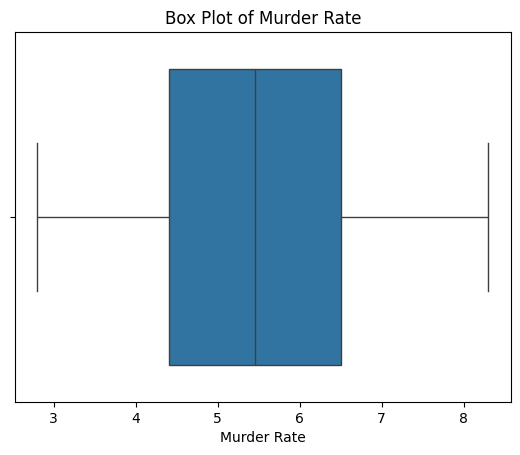

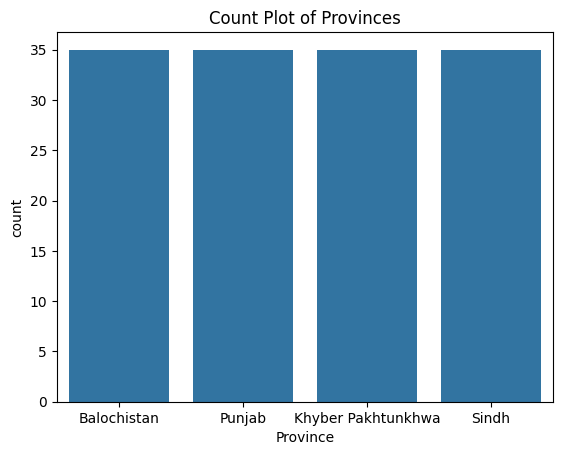

              Year  Murder Rate  Poverty Rate (%)  Unemployment Rate (%)  \
count   140.000000   140.000000      1.400000e+02             140.000000   
mean   2007.000000     5.490000      7.415476e+00               6.253571   
std      10.135769     1.417785      9.598283e+00               3.510261   
min    1990.000000     2.800000      5.000000e-08               0.500000   
25%    1998.000000     4.400000      1.000000e-03               3.000000   
50%    2007.000000     5.450000      2.000000e+00               6.000000   
75%    2016.000000     6.500000      1.325000e+01               9.000000   
max    2024.000000     8.300000      3.500000e+01              13.500000   

       Income Inequality Index  Education Level (Avg. Years)  \
count             1.400000e+02                    140.000000   
mean              9.553968e-02                      9.551429   
std               1.339877e-01                      3.010640   
min               5.000000e-10                      4.20000

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a DataFrame named 'df'

# 1. Numerical Variables
# Histogram
plt.hist(df['Murder Rate'], bins=20)
plt.xlabel('Murder Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Murder Rate')
plt.show()

# Box Plot
sns.boxplot(x=df['Murder Rate'])
plt.title('Box Plot of Murder Rate')
plt.show()

# 2. Categorical Variables
# Bar Plot
sns.countplot(x='Province', data=df)
plt.title('Count Plot of Provinces')
plt.show()

# Summary Statistics
print(df.describe())

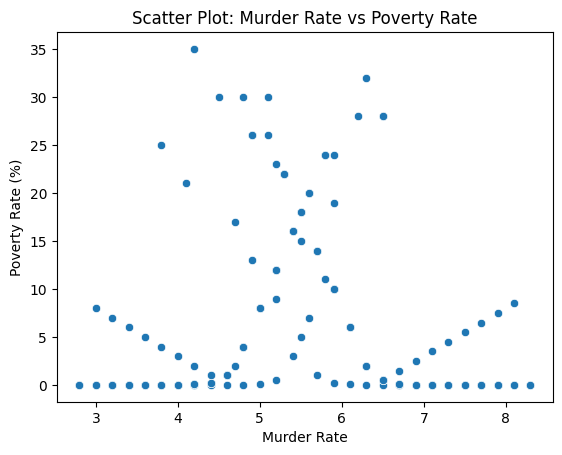

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
sns.scatterplot(x='Murder Rate', y='Poverty Rate (%)', data=df)
plt.title('Scatter Plot: Murder Rate vs Poverty Rate')
plt.show()

In [14]:
# Assuming missing values are encoded as NaN
df.fillna(method='ffill', inplace=True)  # Fill with previous non-null value
# OR
df.fillna(method='bfill', inplace=True)  # Fill with next non-null value
# OR
df.fillna(df['Murder Rate'].mean(), inplace=True)  # Fill with mean of 'Murder Rate'

C:\Users\CAPTAN\AppData\Local\Temp\ipykernel_1420\722915579.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Fill with previous non-null value
C:\Users\CAPTAN\AppData\Local\Temp\ipykernel_1420\722915579.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Fill with next non-null value


In [16]:
df = pd.read_csv('Murder dataset.csv')
df

,Year,Province,Murder Rate,Poverty Rate (%),Unemployment Rate (%),Income Inequality Index,Education Level (Avg. Years),Literacy Rate (%)
0,1990,Balochistan,4.2,3.500000e+01,12.0,4.500000e-01,4.2,40
1,1991,Balochistan,6.3,3.200000e+01,10.0,4.200000e-01,4.5,42
2,1992,Balochistan,4.8,3.000000e+01,9.0,4.000000e-01,4.8,44
3,1993,Balochistan,6.5,2.800000e+01,8.0,3.800000e-01,5.0,45
4,1994,Balochistan,5.1,2.600000e+01,7.0,3.600000e-01,5.8,43
...,...,...,...,...,...,...,...,...
135,2020,Sindh,7.9,1.000000e-05,10.0,5.000000e-08,13.8,105
136,2021,Sindh,3.0,5.000000e-06,10.5,2.000000e-08,14.1,107
137,2022,Sindh,8.1,2.000000e-06,11.0,1.000000e-08,14.4,109
138,2023,Sindh,2.8,1.000000e-06,11.5,5.000000e-09,14.7,111


In [18]:
# Select features (independent variables)
X = df[['Poverty Rate (%)', 'Unemployment Rate (%)', 'Income Inequality Index', 'Education Level (Avg. Years)', 'Literacy Rate (%)']]

# Select target variable (dependent variable)
y = df['Murder Rate']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Create a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 2.3532764722141346


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 2.3532764722141346
Root Mean Squared Error: 1.534039266842324
Mean Absolute Error: 1.23215544683964
R-squared Score: -0.02779766483528845


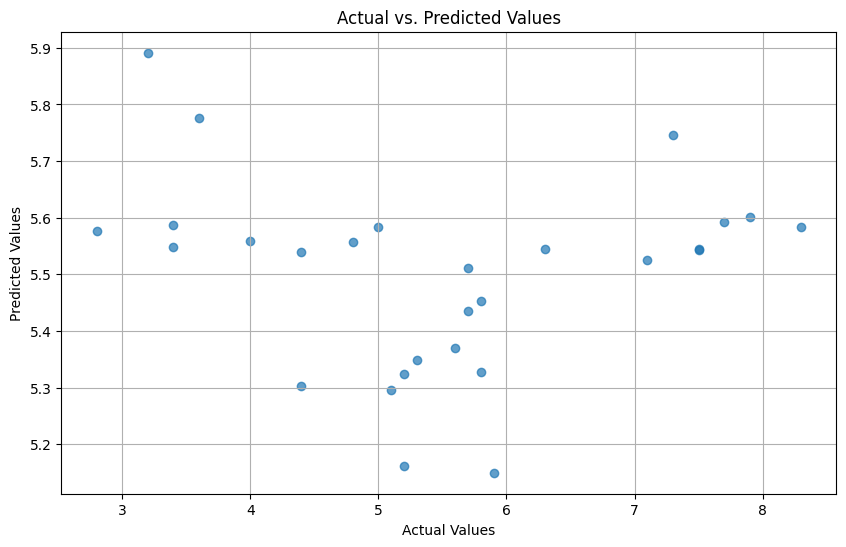

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.show()

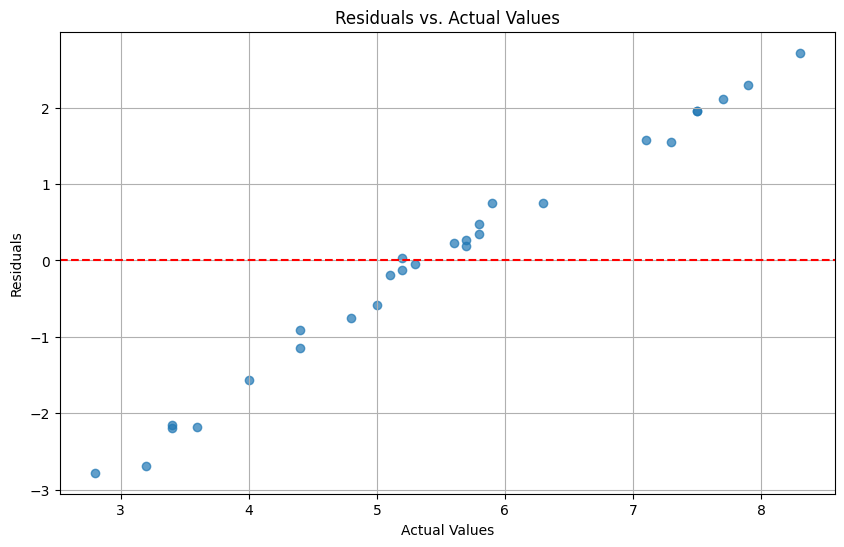

In [28]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Actual Values")
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

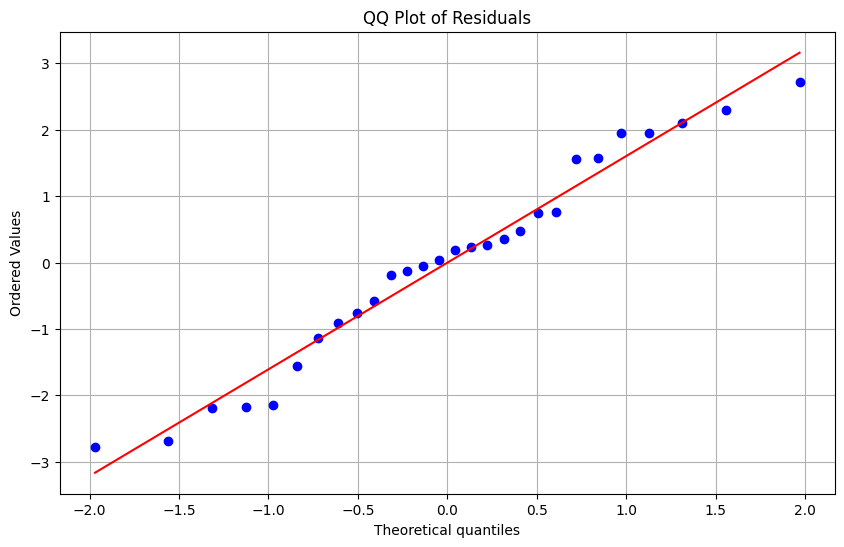

In [29]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title("QQ Plot of Residuals")
plt.grid(True)
plt.show()

In [31]:
import joblib
joblib.dump(model, 'murder_rate_predictor.joblib')

['murder_rate_predictor.joblib']

In [33]:
# Load the model
model = joblib.load('murder_rate_predictor.joblib')

def predict_murder_rate(poverty_rate, unemployment_rate, income_inequality, education_level, literacy_rate):
    # Prepare the input features as a 2D array for the model
    features = np.array([[poverty_rate, unemployment_rate, income_inequality, education_level, literacy_rate]])
    prediction = model.predict(features)
    return prediction[0]  # Return the murder rate prediction

# Example usage:
predicted_murder_rate = predict_murder_rate(10, 5, 0.15, 8, 70)
print("Predicted Murder Rate:", predicted_murder_rate)


Predicted Murder Rate: 5.377972930381717


C:\Users\CAPTAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
